**Travail Pratique: Sujet: Prédiction des prix des maisons 🏡**

**Objectif du projet**

L'objectif est de prédire le prix d'une maison en fonction de plusieurs caractéristiques comme la surface, le nombre de chambres, l’année de construction, etc.

In [ ]:
# Installer l'API Kaggle
!pip install kaggle

# Créer le dossier Kaggle s'il n'existe pas
!mkdir -p ~/.kaggle

# Importer kaggle.json
from google.colab import files
files.upload()  # Sélectionne ton fichier kaggle.json ici

# Déplacer kaggle.json vers le bon dossier
!mv kaggle.json ~/.kaggle/

# Modifier les permissions du fichier
!chmod 600 ~/.kaggle/kaggle.json

# Vérifier que l'authentification fonctionne
!kaggle competitions list


Saving kaggle.json to kaggle.json
ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2    2025-04-01 23:59:00  Featured         2,117,152 Usd       1230           False  
https://www.kaggle.com/competitions/konwinski-prize                              2025-03-12 23:59:00  Featured         1,225,000 Usd        220           False  
https://www.kaggle.com/competitions/czii-cryo-et-object-identification           2025-02-05 23:59:00  Featured            75,000 Usd        912           False  
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions         2025-03-05 23:59:41  Research            50,000 Usd       2092           Fa

In [ ]:
#telechargeons maintenant le dataset de prix:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 30.2MB/s]


In [ ]:
#Extraction du zip:
import zipfile

# Extraire le fichier ZIP
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", "r") as zip_ref:
    zip_ref.extractall("house_data")

# Vérifier le contenu
import os
os.listdir("house_data")


['train.csv', 'data_description.txt', 'sample_submission.csv', 'test.csv']

In [ ]:
import pandas as pd

# Charger les données
df = pd.read_csv("house_data/train.csv")

# Afficher les premières lignes
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#les bibliotheques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Pour visualiser les valeurs manquantes

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib


In [ ]:
# Charger le fichier train.csv
df = pd.read_csv("house_data/train.csv")

# Afficher les 5 premières lignes
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Infos générales
df.info()

# Statistiques descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:


# Charger les données pour vérifier les types
df = pd.read_csv("house_data/train.csv")

# Séparer les colonnes en numériques et catégoriques
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Colonnes numériques ({len(num_features)}) : {num_features}")
print(f"📊 Colonnes catégoriques ({len(cat_features)}) : {cat_features}")


📊 Colonnes numériques (38) : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
📊 Colonnes catégoriques (43) : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Fun

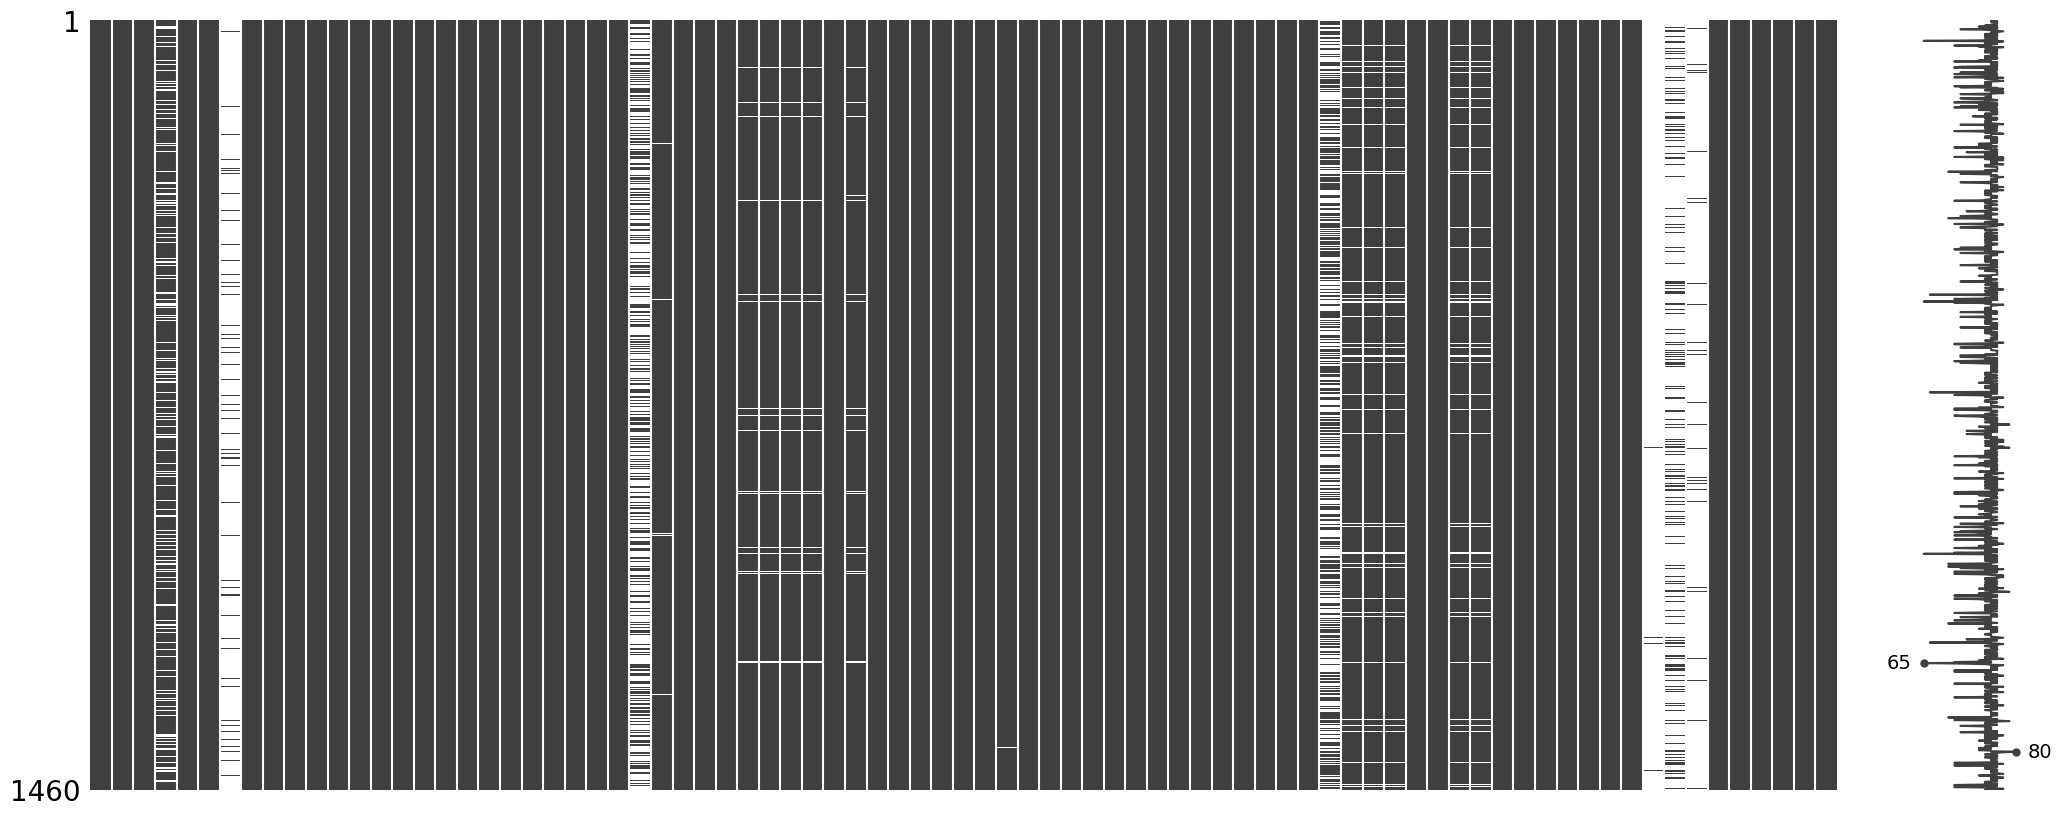

In [ ]:
# Voir le nombre de valeurs manquantes
df.isnull().sum().sort_values(ascending=False).head(10)

# Visualiser les valeurs manquantes
msno.matrix(df)
plt.show()


In [ ]:
df = df.drop(columns=['Id'])  # Supprimer l'ID car il n'est pas utile


In [ ]:
# Séparer les colonnes numériques et catégoriques
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

# Remplacer les valeurs manquantes dans les colonnes numériques avec la médiane
imputer_num = SimpleImputer(strategy="median")
df[num_features] = imputer_num.fit_transform(df[num_features])

# Remplacer les valeurs manquantes dans les colonnes catégoriques avec le mode
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_features] = imputer_cat.fit_transform(df[cat_features])


In [ ]:
# Afficher les 5 premières lignes
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0


Encodage des variables catégoriques
Les modèles de Machine Learning ne peuvent pas traiter du texte directement, donc on les encode en variables numériques avec get_dummies() :

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
#Définition des Features (X) et de la Target (y)
X = df.drop(columns=['SalePrice'])  # Supprimer la colonne cible
y = df['SalePrice']  # Définir la variable cible


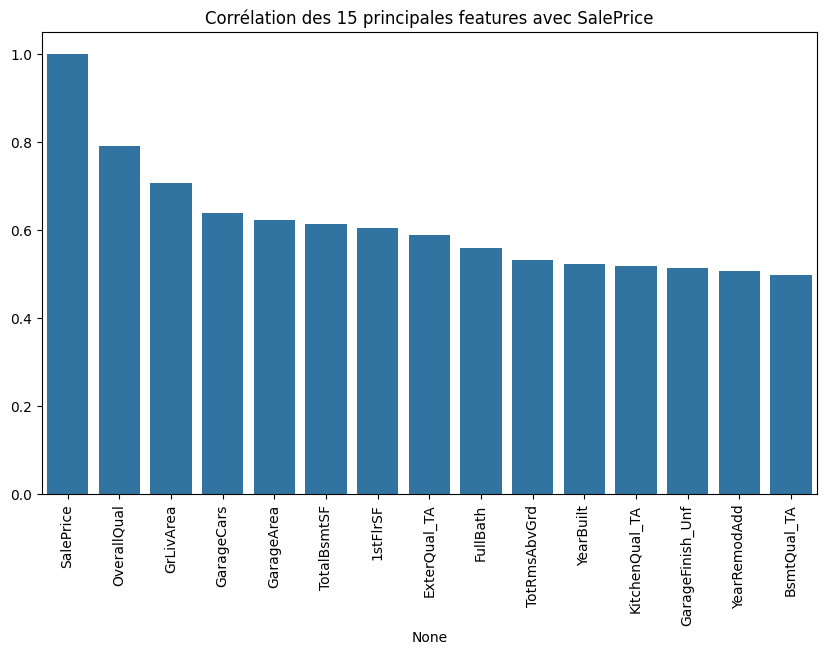

In [ ]:

# Calcul des corrélations avec SalePrice
corr_matrix = df.corr()
top_corr = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(15)

# Afficher les 15 variables les plus corrélées avec le prix
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.index, y=top_corr.values)
plt.xticks(rotation=90)
plt.title("Corrélation des 15 principales features avec SalePrice")
plt.show()


<Figure size 1200x600 with 0 Axes>

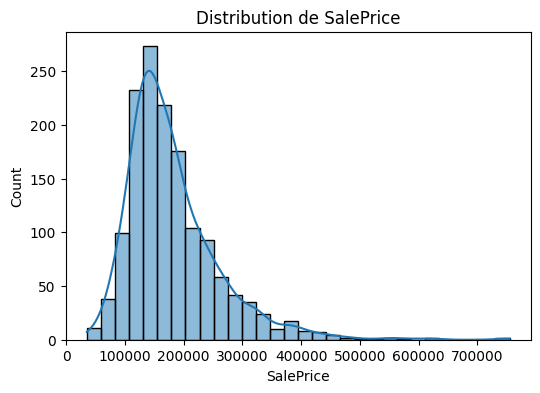

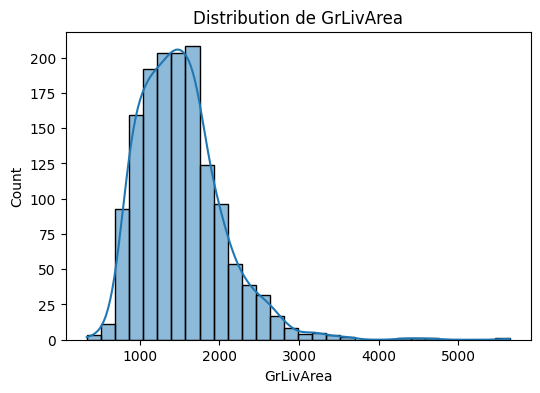

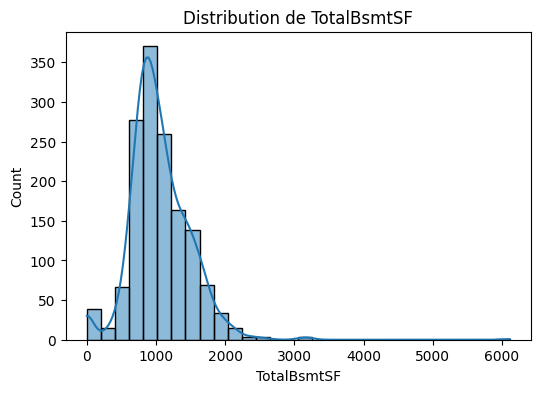

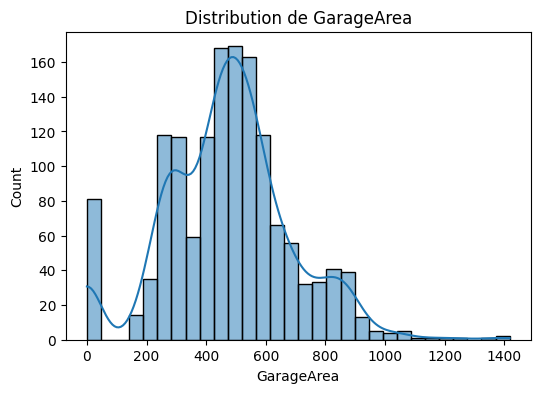

<Figure size 1200x600 with 0 Axes>

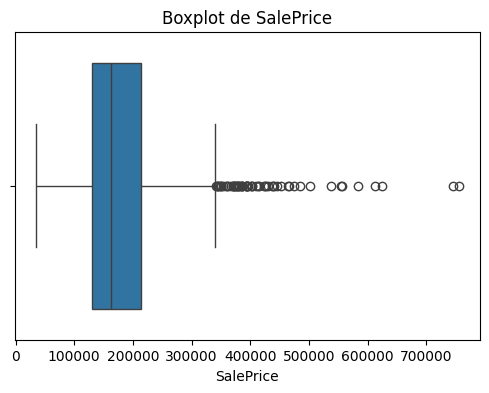

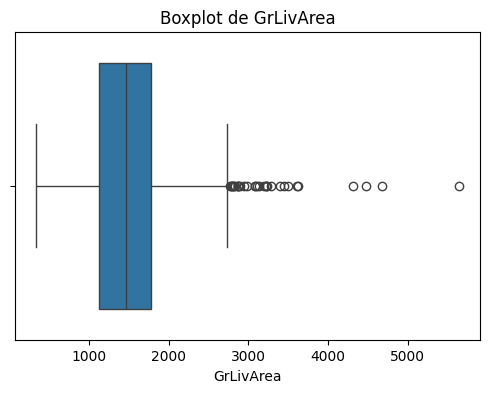

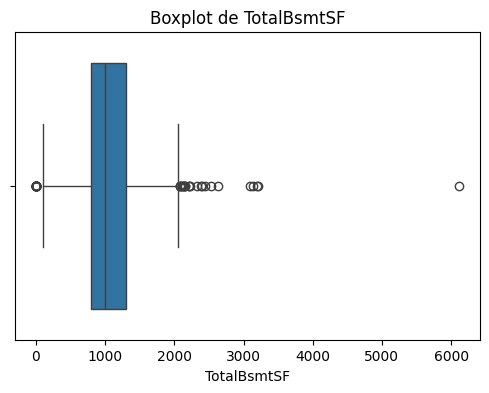

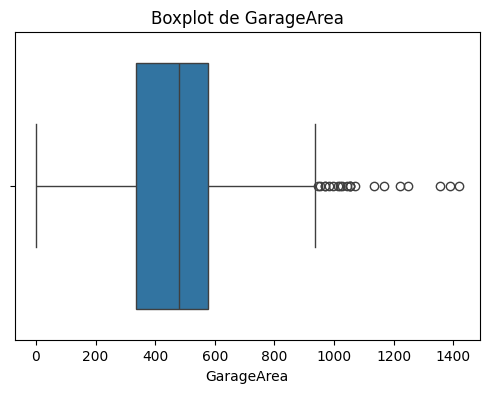

In [ ]:

# Liste des variables clés
features = ["SalePrice", "GrLivArea", "TotalBsmtSF", "GarageArea"]

# Histogramme + KDE
plt.figure(figsize=(12, 6))
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution de {feature}")
    plt.show()

# Boxplot pour détecter les outliers
plt.figure(figsize=(12, 6))
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot de {feature}")
    plt.show()


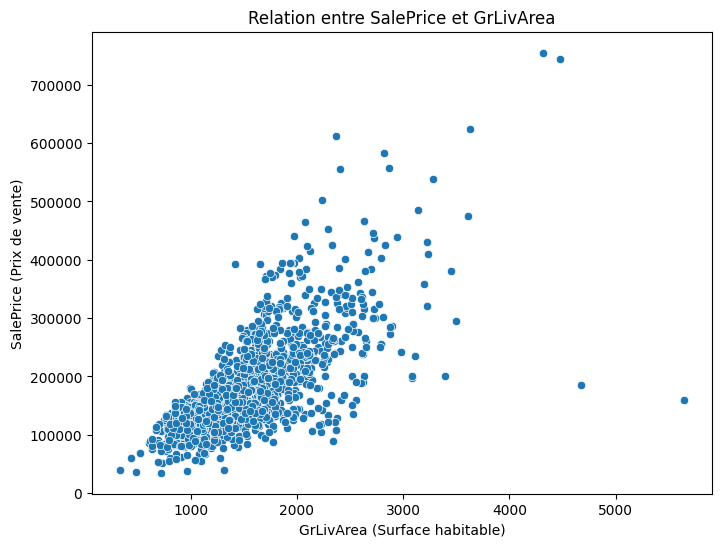

In [ ]:


# Scatter plot entre SalePrice et GrLivArea
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.xlabel("GrLivArea (Surface habitable)")
plt.ylabel("SalePrice (Prix de vente)")
plt.title("Relation entre SalePrice et GrLivArea")
plt.show()


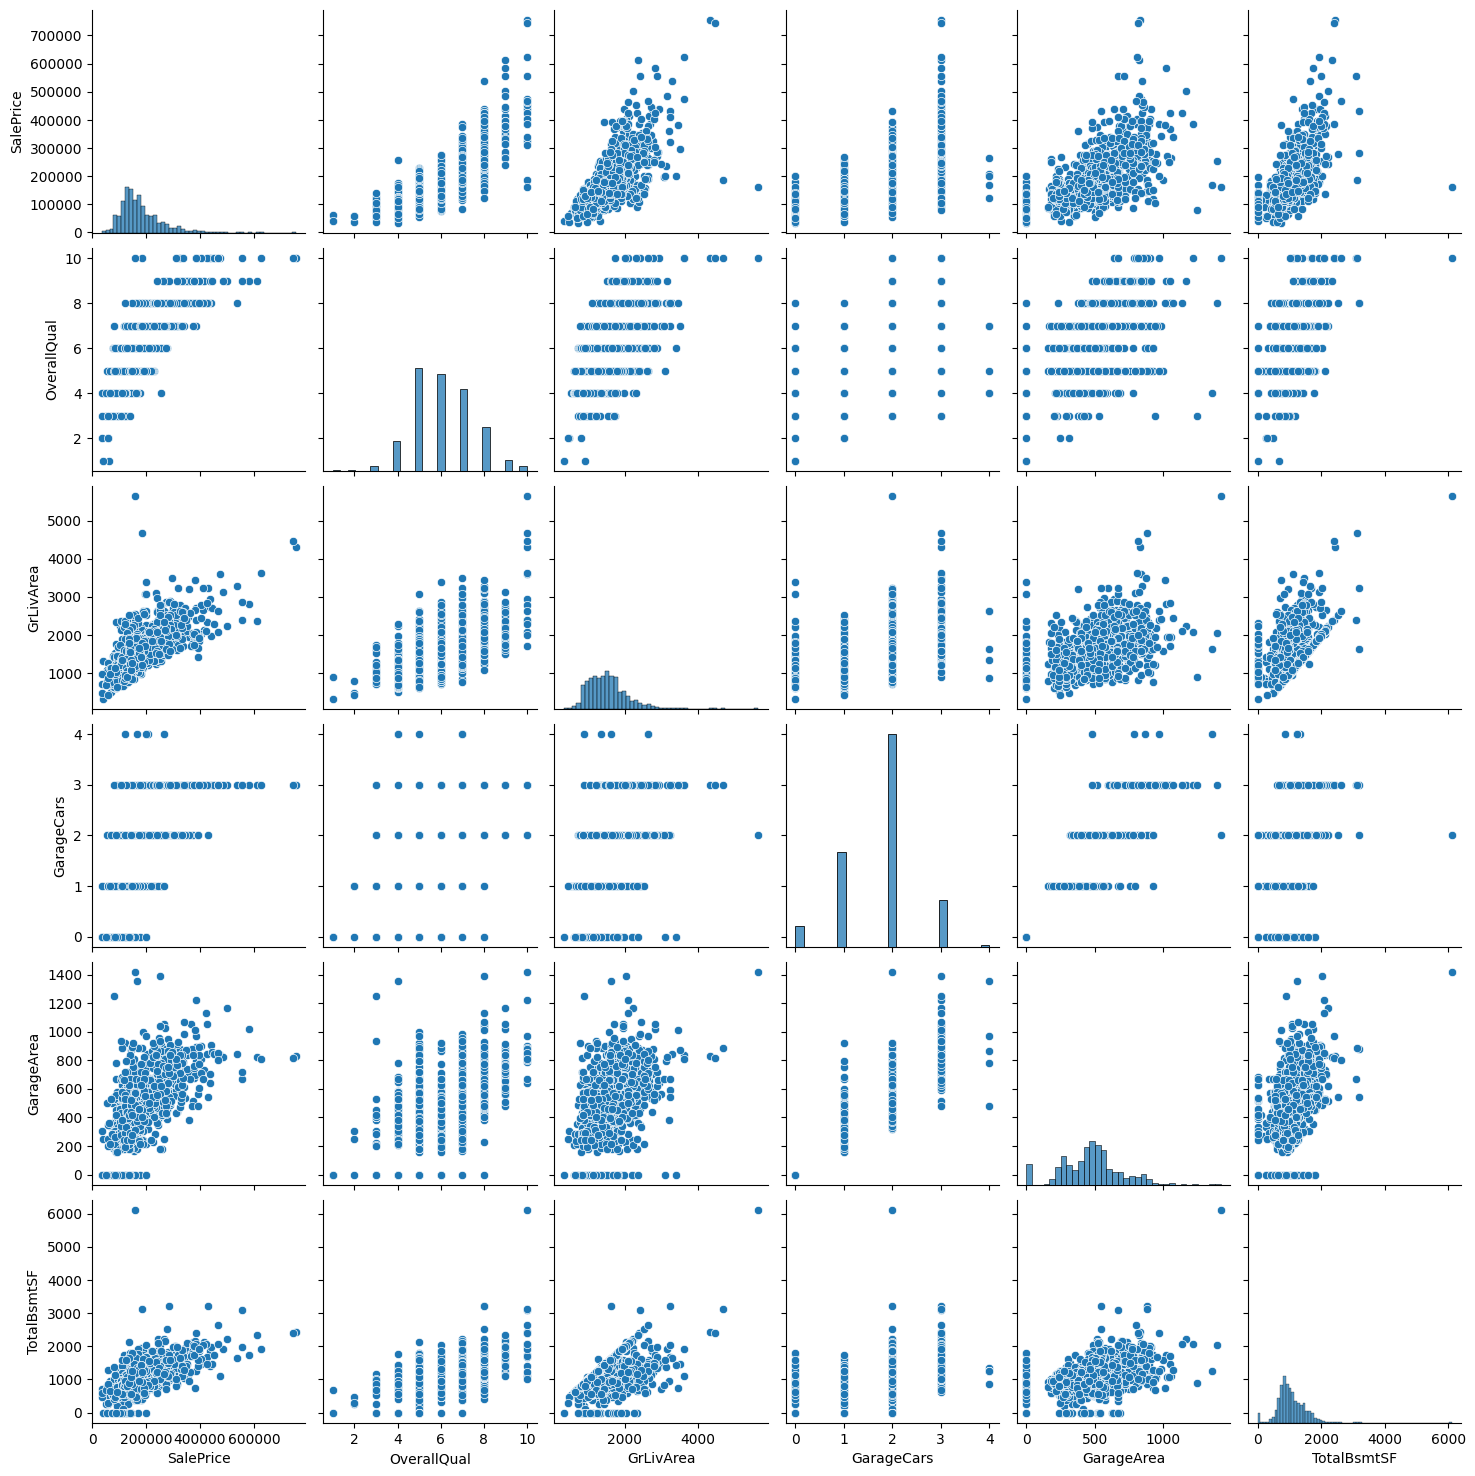

In [ ]:
# Sélection des 6 variables les plus corrélées avec SalePrice
top_features = df.corr()["SalePrice"].abs().sort_values(ascending=False).head(6).index

# Pair plot des variables les plus corrélées
sns.pairplot(df[top_features])
plt.show()


In [ ]:
#Division en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#On applique une Standardisation pour améliorer la convergence du modèle :
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Sauvegardons la liste des colonnes utilisées pendant l'entraînement
joblib.dump(list(X.columns), "features_list.pkl")

['features_list.pkl']

In [ ]:
#On entraîne un Random Forest Regressor avec 100 arbres :
# Création et entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Sauvegarde du modèle
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [ ]:
#On évalue la performance avec MAE, RMSE et R² :
# Prédictions sur le test set
y_pred = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error: {mae}")
print(f"📌 Root Mean Squared Error: {rmse}")
print(f"📌 R² Score: {r2}")


📌 Mean Absolute Error: 17622.976883561645
📌 Root Mean Squared Error: 28861.600984393222
📌 R² Score: 0.8914007059306277


Ces résultats correspondent aux **métriques d'évaluation** du modèle **Random Forest Regressor** pour la prédiction des prix des maisons. Voyons **ce que chaque métrique signifie** et **comment interpréter ces valeurs**.  

---

## **📌 1. Mean Absolute Error (MAE)**
👉 **Résultat obtenu :** `MAE = 17622.97`  
👉 **Signification :** L'erreur moyenne entre les prix réels (`y_test`) et les prix prédits (`y_pred`).  
👉 **Interprétation :** En moyenne, notre modèle se trompe de **17 622 $** dans ses prédictions.  
💡 **Plus le MAE est bas, plus le modèle est précis.**  

---

## **📌 2. Root Mean Squared Error (RMSE)**
👉 **Résultat obtenu :** `RMSE = 28861.60`  
👉 **Signification :** L'erreur quadratique moyenne nous donne une idée de l'écart type des erreurs du modèle.  
👉 **Interprétation :** Les erreurs moyennes du modèle sont d’environ **28 861 $**, mais cette métrique pénalise plus fortement les grosses erreurs.  
💡 **Le RMSE est toujours supérieur ou égal au MAE et doit être le plus bas possible.**  

---

## **📌 3. R² Score (Coefficient de Détermination)**
👉 **Résultat obtenu :** `R² = 0.8914`  
👉 **Signification :** Indique combien de **variance des prix des maisons** est expliquée par le modèle.  
👉 **Interprétation :**  
- `R² = 1` → Le modèle est parfait  
- `R² = 0` → Le modèle est aussi bon qu'une moyenne simple  
- `R² négatif` → Le modèle est mauvais  
💡 **Avec `R² = 0.8914`, cela signifie que notre modèle explique environ 89.14% des variations des prix des maisons.** C'est **un bon score**, mais il y a encore une marge d'amélioration.  

---

## **📈 Conclusion : Notre modèle est-il bon ?**
✅ **Points positifs :**  
- `R² = 0.89` montre que notre modèle explique bien les prix des maisons.  
- Le **MAE et RMSE** sont dans une plage raisonnable, ce qui signifie que les prédictions sont proches des valeurs réelles.  

In [ ]:
# Charger le modèle
model = joblib.load("house_price_model.pkl")

# Vérifier le nombre de features attendues par le modèle
print(f"Nombre de features attendues : {model.n_features_in_}")


Nombre de features attendues : 244


In [ ]:
print("Colonnes utilisées à l'entraînement :", list(X.columns))



Colonnes utilisées à l'entraînement : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawf